<a href="https://colab.research.google.com/github/julianzr27/Proyecto-Final/blob/main/Proyecto_Final_Final%E2%80%93_Anal%C3%ADtica_de_Negocios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Descripción de los datos**

La base de datos contiene información sobre solicitantes de préstamos y el estado de aprobación de sus solicitudes. Su propósito principal es facilitar el análisis y la construcción de modelos para predecir si un préstamo será aprobado o rechazado, basándose en diversas características del solicitante y los términos del préstamo. Cada uno de los solicitantes de préstamo está descrito en función de 12 variables:

- **person_age**: Edad del solicitante en años.
- **person_gender**: Género del solicitante.
- **person_income**: Ingreso anual del solicitante.
- **person_home_ownership**: Estado de propiedad de la vivienda del solicitante (ej., alquila, posee, hipoteca).
- **loan_amnt**: Monto del préstamo solicitado.
- **loan_intent**: Propósito del préstamo (ej., educación, médico, personal, etc.).
- **loan_int_rate**: Tasa de interés del préstamo.
- **loan_percent_income**: Porcentaje del ingreso anual que representa el monto del préstamo.
- **cb_person_cred_hist_length**: Duración del historial crediticio del solicitante en años.
- **credit_score**: Puntaje de crédito del solicitante.
- **previous_loan_defaults_on_file**: Indica si el solicitante ha tenido incumplimientos de préstamos anteriores.
- **loan_status**: Variable binaria que indica si el préstamo fue aprobado (1) o rechazado (0).

El análisis se centrará en estas variables para predecir la probabilidad de aprobación mediante un modelo basado en árboles de decisión y redes neuronales.

In [ ]:
!pip install tensorflow

0. Se proceden a cargar las librerías

In [ ]:
import numpy as np
import pandas as pd

#Librerías del árbol
from  sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Conectar al Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Se procede con la carga de datos

In [ ]:
nxl ="/content/drive/MyDrive/loan_data.csv"
XDB = pd.read_csv(nxl)
XDB=XDB.dropna()

display(XDB.head(100))

total_filas = XDB.shape[0]
print(f"El número total de datos en la base de datos es: {total_filas}")

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,23.0,male,Associate,145092.0,0,RENT,25600.0,EDUCATION,12.69,0.18,3.0,557,Yes,0
96,24.0,female,Bachelor,15928.0,1,OWN,1600.0,MEDICAL,13.57,0.10,3.0,689,Yes,0
97,22.0,male,Bachelor,73131.0,3,RENT,25475.0,VENTURE,10.99,0.35,3.0,681,No,1
98,25.0,male,Master,281501.0,4,MORTGAGE,20000.0,MEDICAL,14.27,0.07,4.0,623,Yes,0


El número total de datos en la base de datos es: 45000


2. Se crea el modelo Árboles de Decisión

In [ ]:
# Convertir la variable 'person_gender' a numérica
XDB["person_gender"] = XDB["person_gender"].map({"female": 0, "male": 1})

# Convertir la variable 'person_home_ownership' a numérica
loan_intent_mapping1 = {'RENT': 0, 'OWN': 1, 'MORTGAGE': 2, 'OTHER': 3}
XDB["person_home_ownership"] = XDB["person_home_ownership"].map(loan_intent_mapping1)

# Convertir la variable 'loan_intent' a numérica
loan_intent_mapping2 = {'PERSONAL': 0, 'EDUCATION': 1, 'MEDICAL': 2, 'VENTURE': 3, 'HOMEIMPROVEMENT': 4, 'DEBTCONSOLIDATION': 5}
XDB["loan_intent"] = XDB["loan_intent"].map(loan_intent_mapping2)


# Convertir la variable 'previous_loan_defaults_on_file' a numérica
XDB["previous_loan_defaults_on_file"] = XDB["previous_loan_defaults_on_file"].map({"No": 0, "Yes": 1})


# Seleccionar las variables de entrada
XD = XDB[['person_age', 'person_gender','person_income', 'person_home_ownership', 'loan_amnt','loan_intent',
          'loan_percent_income', 'cb_person_cred_hist_length',  'credit_score',
          'previous_loan_defaults_on_file']]

display(XD.head())

#Variable salida
yd = XDB[['loan_status']]



,person_age,person_gender,person_income,person_home_ownership,loan_amnt,loan_intent,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,0,71948.0,0,35000.0,0,0.49,3.0,561,0
1,21.0,0,12282.0,1,1000.0,1,0.08,2.0,504,1
2,25.0,0,12438.0,2,5500.0,2,0.44,3.0,635,0
3,23.0,0,79753.0,0,35000.0,2,0.44,2.0,675,0
4,24.0,1,66135.0,0,35000.0,2,0.53,4.0,586,0


2.1. Se procede con la implementación del modelo

In [ ]:
mar=DecisionTreeClassifier(criterion='gini', max_depth=4)
mar.fit(XD,yd)

#Se procede con la gráfica
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

ve=['person_age', 'person_gender','person_income', 'person_home_ownership', 'loan_amnt','loan_intent',
    'loan_percent_income', 'cb_person_cred_hist_length',  'credit_score',
          'previous_loan_defaults_on_file']
dot_data=export_graphviz(mar, feature_names=ve)
graph=graph_from_dot_data(dot_data)
graph.write_png('ArbolDecision.png')

True

2.2. Se determina el número de nodos puros para el árbol asociado con la estructura del modelo.

In [ ]:
num_nodos_puros = sum(mar.tree_.impurity == 0)
print(f"Número de nodos puros en el árbol (Gini = 0.0): {num_nodos_puros}")

Número de nodos puros en el árbol (Gini = 0.0): 3


2.3. Se procede con el pronóstico de préstamos que no fueron admitidos

In [ ]:
nxl ="/content/drive/MyDrive/loan_data.csv"
XDB0 = pd.read_csv(nxl)
XDB0=XDB0.dropna()

# Convertir la variable 'person_gender' a numérica
XDB0["person_gender"] = XDB0["person_gender"].map({"female": 0, "male": 1})

# Convertir la variable 'person_home_ownership' a numérica
loan_intent_mapping1 = {'RENT': 0, 'OWN': 1, 'MORTGAGE': 2, 'OTHER': 3}
XDB0["person_home_ownership"] = XDB0["person_home_ownership"].map(loan_intent_mapping1)

# Convertir la variable 'loan_intent' a numérica
loan_intent_mapping2 = {'PERSONAL': 0, 'EDUCATION': 1, 'MEDICAL': 2, 'VENTURE': 3, 'HOMEIMPROVEMENT': 4, 'DEBTCONSOLIDATION': 5}
XDB0["loan_intent"] = XDB0["loan_intent"].map(loan_intent_mapping2)


# Convertir la variable 'previous_loan_defaults_on_file' a numérica
XDB0["previous_loan_defaults_on_file"] = XDB0["previous_loan_defaults_on_file"].map({"No": 0, "Yes": 1})


# Seleccionar las variables de entrada
XD0 = XDB0[['person_age', 'person_gender','person_income', 'person_home_ownership', 'loan_amnt','loan_intent',
          'loan_percent_income', 'cb_person_cred_hist_length',  'credit_score',
          'previous_loan_defaults_on_file']]

display(XD0.head())

#Variable salida
yd0 = XDB0[['loan_status']]


# Mantener todos los solicitantes
filas = XDB0.index

# Hacer la predicción
y_pred = mar.predict(XD0)

# Crear el informe en Excel
df = pd.DataFrame(XD0)
df["LoanStatus_Predicted"] = y_pred
df.insert(0, "Solicitante", filas)  # Agregar índice de solicitantes

# Guardar en Excel
df.to_excel("Pronostico_loan.xlsx", index=False)

,person_age,person_gender,person_income,person_home_ownership,loan_amnt,loan_intent,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,0,71948.0,0,35000.0,0,0.49,3.0,561,0
1,21.0,0,12282.0,1,1000.0,1,0.08,2.0,504,1
2,25.0,0,12438.0,2,5500.0,2,0.44,3.0,635,0
3,23.0,0,79753.0,0,35000.0,2,0.44,2.0,675,0
4,24.0,1,66135.0,0,35000.0,2,0.53,4.0,586,0


2.4. Se evalúa el comportamiento del modelo

In [ ]:
ydp=mar.predict(XD) #pronóstico base de datos original
cm=confusion_matrix(yd,ydp)
print("La matriz de confusión es: \n",cm)

VN= cm[0,0];FP= cm[0,1];VT= cm[1,0];VP= cm[1,1]

#Métricas de desempeño
Ex= (VP+VN)/(VP+VN+FP+VT) #Exactitud: comportamiento general preaprobando
print("La exactitud del modelo es:\n ",Ex)

TE= (FP+VT)/(VP+VN+FP+VT) #Tasa de error: comportamiento general no preaprobando
print("La tasa de error del modelo es:\n ",TE)

Se= VP/(VP+VT) #Sensibilidad: Comportamiento correcto preaprobando
print("La sensibilidad del modelo es:\n ",Se)

Sp= VN/(VN+FP) #Especificidad: Comportamiento correcto no preaprobado
print("La especificidad del modelo es:\n ",Sp)

Pr=VP/(VP+FP) #Precisión
print("La precisión del modelo es:\n ",Pr)

Neg= VN/(VN+VT) #Precisión negativa: comportamiento correcto no preaprobado
print("La precisión negativa del modelo es:\n ",Neg)

La matriz de confusión es: 
 [[33017  1983]
 [ 3771  6229]]
La exactitud del modelo es:
  0.8721333333333333
La tasa de error del modelo es:
  0.12786666666666666
La sensibilidad del modelo es:
  0.6229
La especificidad del modelo es:
  0.9433428571428571
La precisión del modelo es:
  0.7585241110569898
La precisión negativa del modelo es:
  0.8974937479612918


3. Se crea el modelo MADALINE (Multi Adaptive Linear-Sigmoid)

Los datos de entrada normalizados son: 
 [[0.15277778 0.         0.00999171 ... 0.1        0.66       0.        ]
 [0.14583333 0.         0.00170565 ... 0.06666667 0.59294118 1.        ]
 [0.17361111 0.         0.00172732 ... 0.1        0.74705882 0.        ]
 ...
 [0.22916667 1.         0.00790777 ... 0.33333333 0.78588235 0.        ]
 [0.20138889 1.         0.00460562 ... 0.2        0.71058824 0.        ]
 [0.16666667 1.         0.00716715 ... 0.1        0.73882353 0.        ]]
Los datos de salida normalizados son: 
 [[1]
 [0]
 [1]
 ...
 [1]
 [1]
 [1]]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 10)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110 (440.00 B)

 Trainable params: 110 (440.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8365  
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7990 
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7658  
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7350 
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7069 
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6813 
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6564 
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6343 
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6127 
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5918 
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5736 
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5584 
Epoch 13/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5468 
Epoch 14/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5352 
Epoch 15/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5259 
Epoch 16/100
9/9 

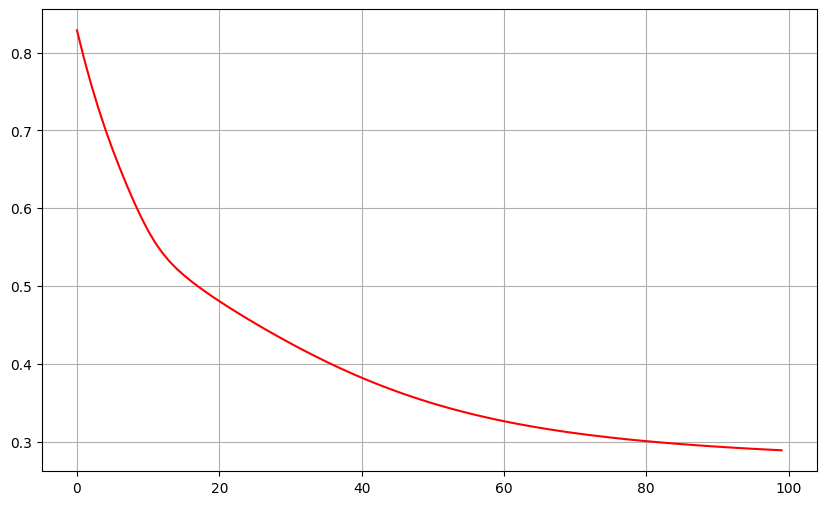

Los efectos independientes son:
 [[-0.8561562 ]
 [ 0.0278824 ]
 [-2.3461502 ]
 [-1.7220527 ]
 [-0.10286012]
 [ 0.49934542]
 [ 4.405896  ]
 [-0.584471  ]
 [-1.1663208 ]
 [-3.6031578 ]]
La variable de entrada 1 tiene un efecto negativo sobre la salida.
La variable de entrada 2 tiene un efecto positivo sobre la salida.
La variable de entrada 3 tiene un efecto negativo sobre la salida.
La variable de entrada 4 tiene un efecto negativo sobre la salida.
La variable de entrada 5 tiene un efecto negativo sobre la salida.
La variable de entrada 6 tiene un efecto positivo sobre la salida.
La variable de entrada 7 tiene un efecto positivo sobre la salida.
La variable de entrada 8 tiene un efecto negativo sobre la salida.
La variable de entrada 9 tiene un efecto negativo sobre la salida.
La variable de entrada 10 tiene un efecto negativo sobre la salida.


In [ ]:
# Seleccionar las variables de entrada
XD1 = np.array(XDB[['person_age', 'person_gender','person_income', 'person_home_ownership',
                  'loan_amnt','loan_intent','loan_percent_income', 'cb_person_cred_hist_length',  'credit_score',
          'previous_loan_defaults_on_file']])

# Seleccionar la variable objetivo
yp1 = np.array(XDB[['loan_status']])

# 2. Normalizar los datos de entrada y salida
XDn = XD1 / np.max(XD1, axis=0)
yp = yp1 #/ np.max(yp1, axis=0)

print("Los datos de entrada normalizados son: \n", XDn)  # Mostrar las primeras 5 filas
print("Los datos de salida normalizados son: \n", yp)  # Mostrar las primeras 5 filas


# 3. Definir el modelo
madaline_credito = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, input_shape=(10,), use_bias=False, activation='relu'),
    tf.keras.layers.Dense(units=1, use_bias=False, activation='sigmoid')
])

madaline_credito.summary()
madaline_credito.compile(optimizer='adam', loss='binary_crossentropy')
history_credito = madaline_credito.fit(XDn, yp, epochs=100,batch_size=5000)

# 4. Evaluar el modelo
yp2=madaline_credito.predict(XDn)
yp2_classes = (yp2 > 0.5).astype(int)

# Puedes usar la matriz de confusión como en el árbol de decisión para evaluar el modelo
from sklearn.metrics import confusion_matrix
cm_nn = confusion_matrix(yp, yp2_classes)
print("La matriz de confusión para la red neuronal es: \n", cm_nn)


VN= cm_nn[0,0];FP= cm_nn[0,1];VT= cm_nn[1,0];VP= cm_nn[1,1]

#Métricas de desempeño
Ex= (VP+VN)/(VP+VN+FP+VT) #Exactitud: comportamiento general preaprobando
print("La exactitud del modelo es:\n ",Ex)

TE= (FP+VT)/(VP+VN+FP+VT) #Tasa de error: comportamiento general no preaprobando
print("La tasa de error del modelo es:\n ",TE)

Se= VP/(VP+VT) #Sensibilidad: Comportamiento correcto preaprobando
print("La sensibilidad del modelo es:\n ",Se)

Sp= VN/(VN+FP) #Especificidad: Comportamiento correcto no preaprobado
print("La especificidad del modelo es:\n ",Sp)

Pr=VP/(VP+FP) #Precisión
print("La precisión del modelo es:\n ",Pr)

Neg= VN/(VN+VT) #Precisión negativa: comportamiento correcto no preaprobado
print("La precisión negativa del modelo es:\n ",Neg)


dfcorr2=pd.DataFrame(np.column_stack((yp2,yp)))
print("La correlación entre es:\n",dfcorr2.corr())


# 5. Visualización de la pérdida durante el entrenamiento
ek = history_credito.history['loss']

plt.figure(figsize=(10, 6))
plt.plot(ek, 'r', label='Pérdida en entrenamiento')
plt.grid(True)
plt.show()

# 6. Efectos independientes
WC= madaline_credito.get_weights()
W=WC[0]; C=WC[1]
a=W@C #Estos son los efectos independientes
print("Los efectos independientes son:\n",a)

for i, val in enumerate(a):
    signo = 'positivo' if val >= 0 else 'negativo'
    print(f"La variable de entrada {i+1} tiene un efecto {signo} sobre la salida.")

**Análisis de Reusltados**

***1. Modelo Árbol de Decisión para la Aprobación de Préstamos***

El modelo de árbol de decisión fue diseñado para clasificar el estado de aprobación de los préstamos, demostrando una exactitud general del 87.21%. Esta métrica indica que el modelo logra una clasificación correcta en aproximadamente 87 de cada 100 casos, lo que sugiere un rendimiento general robusto y una tasa de error manejable del 12.79%. La matriz de confusión detalló 33,017 verdaderos negativos y 6,229 verdaderos positivos, mostrando un volumen significativo de predicciones correctas en ambas clases.

Un aspecto destacado del modelo es su alta especificidad (94.33%). Esto significa que es extremadamente eficiente en la identificación de solicitantes que no son aptos para un préstamo, minimizando los falsos positivos y reduciendo eficazmente el riesgo de otorgar créditos a individuos con alta probabilidad de incumplimiento. Sin embargo, su sensibilidad se sitúa en 62.29%, lo que implica que casi el 38% de los solicitantes realmente aptos son erróneamente clasificados como no aptos (falsos negativos). Esto representa una oportunidad de negocio perdida al rechazar clientes que podrían haber sido valiosos. La precisión del 75.85% para las predicciones positivas es un buen indicador de la fiabilidad cuando el modelo sugiere una aprobación. Además, la presencia de 3 nodos puros (Gini = 0.0) en el árbol subraya la existencia de segmentos de datos donde las reglas de decisión son inequívocas, facilitando la interpretación en esos casos específicos.

***2. Modelo de Red Neuronal Tipo MADALINE***

Para la tarea de predecir el loan_status (estado de aprobación del préstamo), se implementó una red neuronal con una arquitectura tipo MADALINE. Esta configuración incluye una capa densa oculta de 10 neuronas con activación ReLU y una capa de salida con una única neurona, utilizando la función de activación sigmoid para producir una probabilidad de aprobación. El modelo fue entrenado con las 10 variables de entrada clave de los solicitantes, previamente normalizadas.

El modelo de red neuronal tipo MADALINE, configurado para predecir el loan_status (aprobar/rechazar) mostró un rendimiento general prometedor. Su exactitud alcanzó el 85.92%, indicando que clasifica correctamente a la gran mayoría de los solicitantes. La matriz de confusión reveló que, si bien el modelo es muy eficiente en identificar correctamente a los no aptos (especificidad del 93.79%), su capacidad para detectar a los solicitantes que realmente sí son aptos es moderada (sensibilidad del 58.34%), lo que implica un porcentaje significativo de falsos negativos. La precisión del 72.87% para las predicciones positivas es razonable, validando la fiabilidad de las aprobaciones predichas.

El análisis aproximado de los efectos independientes de las variables de entrada sobre la probabilidad de aprobación (loan_status=1) proporcionó insights valiosos. Se observó que variables como el género (person_gender), el tipo de préstamo (loan_intent) y, de manera prominente, el porcentaje de ingreso dedicado al préstamo (loan_percent_income, con un efecto positivo fuerte), tienden a aumentar la probabilidad de aprobación. En contraste, la edad (person_age), los ingresos (person_income), la propiedad de la vivienda (person_home_ownership), el monto del préstamo (loan_amnt), la longitud del historial crediticio (cb_person_cred_hist_length), el score crediticio (credit_score) y, de forma muy marcada, los impagos previos (previous_loan_defaults_on_file), mostraron un efecto negativo en la probabilidad de aprobación




**Conclusiones**

En conclusión, el árbol de decisión es un modelo valioso para la evaluación de riesgo crediticio debido a su fuerte capacidad para prevenir aprobaciones erróneas. No obstante, la relativa baja sensibilidad indica que se sacrifica la identificación de un porcentaje de clientes calificados. Para optimizar su aplicación, sería crucial evaluar el equilibrio entre la mitigación de riesgos (falsos positivos) y la maximización de oportunidades de negocio (falsos negativos) de acuerdo con la estrategia de la institución financiera. Esto podría lograrse ajustando los pesos de las clases, modificando el umbral de decisión, o implementando técnicas de balanceo de datos para mejorar la detección de la clase minoritaria sin comprometer la solidez en la identificación de riesgos.

Por otro lado, la red neuronal tipo MADALINE se ha mostrado capaz de aprender los patrones asociados con la aprobación de préstamos, logrando una correlación predictiva moderada. La convergencia estable de la pérdida durante el entrenamiento valida la efectividad del aprendizaje del modelo. Para la implementación práctica, sería valioso complementar este análisis con técnicas de interpretabilidad de modelos más avanzadas y una validación exhaustiva de las reglas de negocio implícitas